### load the dataset 

In [8]:
import pandas as pd

In [23]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [123]:
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
import numpy as np

In [127]:
import numpy as np

from os import path


import matplotlib.pyplot as plt

#scikit-learn related imports
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pytorch relates imports
import torch
import torch.nn as nn
import torch.optim as optim

# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [132]:
import torch.nn.functional as F

### read csv contains the relational rent fee features (62 features with one label)

In [158]:
df201 = pd.read_csv("features_tabular.csv")

In [159]:
df201

,GEOID,label,TRACTCE10,NAME10,NAMELSAD10,INTPTLAT,INTPTLONG,long+,long-,lat+,...,GROSS RENT Occupied units paying rent Median (dollars),Population in households,YEAR OF ENTRY Population born outside the United States,YEAR OF ENTRY Foreign born,Total households,Total population,Sex ratio (males per 100 females),Median age (years),relation_max_fee,relation_min_fee
0,1.703101e+10,1.0,10100.0,101.00,Census Tract 101,42.02,-87.67,-87.67,-87.67,42.02,...,865.0,4301.0,767.0,733.0,2248.0,4444.0,91.2,33.7,1003.0,943.0
1,1.703101e+10,0.0,10201.0,102.01,Census Tract 102.01,42.02,-87.68,-87.68,-87.68,42.02,...,989.0,7007.0,2710.0,2663.0,2670.0,7197.0,108.0,34.8,1076.0,865.0
2,1.703101e+10,0.0,10202.0,102.02,Census Tract 102.02,42.02,-87.67,-87.67,-87.68,42.02,...,943.0,2173.0,1022.0,963.0,976.0,2487.0,96.1,36.7,1003.0,865.0
3,1.703101e+10,0.0,10300.0,103.00,Census Tract 103,42.02,-87.67,-87.66,-87.67,42.02,...,948.0,5420.0,1608.0,1566.0,2982.0,6413.0,93.2,42.1,990.0,865.0
4,1.703101e+10,0.0,10400.0,104.00,Census Tract 104,42.01,-87.66,-87.66,-87.66,42.01,...,979.0,3868.0,613.0,585.0,1870.0,5411.0,82.5,23.8,990.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1.703184e+10,1.0,843500.0,8435.00,Census Tract 8435,41.84,-87.70,-87.69,-87.70,41.84,...,767.0,1064.0,1007.0,919.0,300.0,10079.0,758.5,29.4,791.0,703.0
795,1.703184e+10,0.0,843600.0,8436.00,Census Tract 8436,41.81,-87.61,-87.61,-87.61,41.81,...,1040.0,2822.0,178.0,178.0,1256.0,2822.0,71.0,35.7,1090.0,693.0
796,1.703184e+10,0.0,843700.0,8437.00,Census Tract 8437,41.95,-87.69,-87.69,-87.69,41.95,...,1264.0,2549.0,518.0,480.0,963.0,2549.0,97.0,34.4,1570.0,1211.0
797,1.703184e+10,0.0,843800.0,8438.00,Census Tract 8438,41.80,-87.64,-87.64,-87.64,41.80,...,1182.0,1699.0,235.0,220.0,630.0,1699.0,91.5,38.3,921.0,719.0


In [160]:
df201.columns

Index(['GEOID', 'label', 'TRACTCE10', 'NAME10', 'NAMELSAD10', 'INTPTLAT',
       'INTPTLONG', 'long+', 'long-', 'lat+', 'lat-',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) Less than $10,000',
       'HEALTH INSURANCE COVERAGE With health insurance coverage',
       'HEALTH INSURANCE COVERAGE With private health insurance',
       'YEAR STRUCTURE BUILT Built 20

In [192]:
data_301 = df201.loc[:798, ['label', 'Agriculture, forestry, fishing and hunting, and mining',
        'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) Less than $10,000',
       'HEALTH INSURANCE COVERAGE With health insurance coverage',
       'HEALTH INSURANCE COVERAGE With private health insurance',
       'YEAR STRUCTURE BUILT Built 2014 or later',
       'YEAR STRUCTURE BUILT Built 2010 to 2013',
       'HOUSING TENURE Renter-occupied',
       'YEAR HOUSEHOLDER MOVED INTO UNIT Moved in 2015 or later',
       'YEAR HOUSEHOLDER MOVED INTO UNIT Moved in 2010 to 2014',
       'VEHICLES AVAILABLE No vehicles available',
       'VEHICLES AVAILABLE 2 vehicles available',
       'VEHICLES AVAILABLE 3 or more vehicles available',
       'OCCUPANTS PER ROOM 1.01 to 1.50', 'OCCUPANTS PER ROOM 1.51 or more',
       'MORTGAGE STATUS Owner-occupied units Housing units with a mortgage',
       '65 years and over',
       'MARITAL STATUS Males 15 years and over Never married',
       'MARITAL STATUS Females 15 years and over Never married',
       'EDUCATIONAL ATTAINMENT Less than 9th grade',
       'EDUCATIONAL ATTAINMENT 9th to 12th grade, no diploma',
       "Percent bachelor's degree or higher",
       'PLACE OF BIRTH Native Different state',
       'SEX AND AGE 62 years and over', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Hispanic or Latino (of any race)',
       'Own children of the householder under 6 years',
       'Own children of the householder 6 to 17 years',
       'Mean travel time to work (minutes)',
       'Median household income (dollars)', 'Mean household income (dollars)',
       'Total housing units', 'Homeowner vacancy rate', 'Rental vacancy rate',
       'ROOM Median rooms', 'VALUE Median (dollars)',
       'SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars)',
       'SELECTED MONTHLY OWNER COSTS (SMOC) Housing units without a mortgage Median (dollars)',
       'GROSS RENT Occupied units paying rent Median (dollars)',
       'Population in households',
       'YEAR OF ENTRY Population born outside the United States',
       'YEAR OF ENTRY Foreign born', 'Total households', 'Total population',
       'Sex ratio (males per 100 females)', 'Median age (years)',
       'relation_max_fee', 'relation_min_fee']]

In [193]:
data_301

,label,"Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services",...,GROSS RENT Occupied units paying rent Median (dollars),Population in households,YEAR OF ENTRY Population born outside the United States,YEAR OF ENTRY Foreign born,Total households,Total population,Sex ratio (males per 100 females),Median age (years),relation_max_fee,relation_min_fee
0,1.0,0.00,0.02,0.02,0.01,0.12,0.08,0.04,0.11,0.11,...,865.0,4301.0,767.0,733.0,2248.0,4444.0,91.2,33.7,1003.0,943.0
1,0.0,0.00,0.02,0.07,0.02,0.11,0.13,0.03,0.09,0.11,...,989.0,7007.0,2710.0,2663.0,2670.0,7197.0,108.0,34.8,1076.0,865.0
2,0.0,0.00,0.03,0.08,0.03,0.13,0.03,0.02,0.06,0.11,...,943.0,2173.0,1022.0,963.0,976.0,2487.0,96.1,36.7,1003.0,865.0
3,0.0,0.00,0.02,0.05,0.01,0.07,0.04,0.00,0.04,0.20,...,948.0,5420.0,1608.0,1566.0,2982.0,6413.0,93.2,42.1,990.0,865.0
4,0.0,0.01,0.01,0.02,0.00,0.14,0.03,0.03,0.05,0.11,...,979.0,3868.0,613.0,585.0,1870.0,5411.0,82.5,23.8,990.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,1.0,0.00,0.03,0.10,0.04,0.16,0.04,0.00,0.01,0.17,...,767.0,1064.0,1007.0,919.0,300.0,10079.0,758.5,29.4,791.0,703.0
795,0.0,0.00,0.01,0.02,0.00,0.08,0.07,0.00,0.16,0.12,...,1040.0,2822.0,178.0,178.0,1256.0,2822.0,71.0,35.7,1090.0,693.0
796,0.0,0.00,0.04,0.10,0.07,0.08,0.04,0.04,0.15,0.18,...,1264.0,2549.0,518.0,480.0,963.0,2549.0,97.0,34.4,1570.0,1211.0
797,0.0,0.00,0.09,0.12,0.02,0.16,0.11,0.00,0.06,0.14,...,1182.0,1699.0,235.0,220.0,630.0,1699.0,91.5,38.3,921.0,719.0


#### replace the error data format with correct version in the dataset

In [266]:
data_301.replace('4,000+', '4000' ,inplace=True)

In [216]:
data_301.replace('1,500+', '1500' ,inplace=True)

In [217]:
data_301.dtypes

label                                                     float64
Agriculture, forestry, fishing and hunting, and mining    float64
Construction                                              float64
Manufacturing                                             float64
Wholesale trade                                           float64
                                                           ...   
Total population                                          float64
Sex ratio (males per 100 females)                         float64
Median age (years)                                        float64
relation_max_fee                                          float64
relation_min_fee                                          float64
Length: 63, dtype: object

### Split dataset

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [220]:
data_301.isnull()

,label,"Agriculture, forestry, fishing and hunting, and mining",Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation and warehousing, and utilities",Information,"Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services",...,GROSS RENT Occupied units paying rent Median (dollars),Population in households,YEAR OF ENTRY Population born outside the United States,YEAR OF ENTRY Foreign born,Total households,Total population,Sex ratio (males per 100 females),Median age (years),relation_max_fee,relation_min_fee
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Complicated model with all 62 features

In [268]:
X_data = data_301[['Agriculture, forestry, fishing and hunting, and mining',
        'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration', 'Public administration',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) Less than $10,000',
       'HEALTH INSURANCE COVERAGE With health insurance coverage',
       'HEALTH INSURANCE COVERAGE With private health insurance',
       'YEAR STRUCTURE BUILT Built 2014 or later',
       'YEAR STRUCTURE BUILT Built 2010 to 2013',
       'HOUSING TENURE Renter-occupied',
       'YEAR HOUSEHOLDER MOVED INTO UNIT Moved in 2015 or later',
       'YEAR HOUSEHOLDER MOVED INTO UNIT Moved in 2010 to 2014',
       'VEHICLES AVAILABLE No vehicles available',
       'VEHICLES AVAILABLE 2 vehicles available',
       'VEHICLES AVAILABLE 3 or more vehicles available',
       'OCCUPANTS PER ROOM 1.01 to 1.50', 'OCCUPANTS PER ROOM 1.51 or more',
       'MORTGAGE STATUS Owner-occupied units Housing units with a mortgage',
       '65 years and over',
       'MARITAL STATUS Males 15 years and over Never married',
       'MARITAL STATUS Females 15 years and over Never married',
       'EDUCATIONAL ATTAINMENT Less than 9th grade',
       'EDUCATIONAL ATTAINMENT 9th to 12th grade, no diploma',
       "Percent bachelor's degree or higher",
       'PLACE OF BIRTH Native Different state',
       'SEX AND AGE 62 years and over', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Hispanic or Latino (of any race)',
       'Own children of the householder under 6 years',
       'Own children of the householder 6 to 17 years',
       'Mean travel time to work (minutes)',
       'Median household income (dollars)', 'Mean household income (dollars)',
       'Total housing units', 'Homeowner vacancy rate', 'Rental vacancy rate',
       'ROOM Median rooms', 'VALUE Median (dollars)',
       'SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars)',
       'SELECTED MONTHLY OWNER COSTS (SMOC) Housing units without a mortgage Median (dollars)',
       'GROSS RENT Occupied units paying rent Median (dollars)',
       'Population in households',
       'YEAR OF ENTRY Population born outside the United States',
       'YEAR OF ENTRY Foreign born', 'Total households', 'Total population',
       'Sex ratio (males per 100 females)', 'Median age (years)',
       'relation_max_fee', 'relation_min_fee']]
y_data = data_301['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.2,
                            random_state=42)

In [267]:
for i in list(data_301.columns):
    data_301[i] = data_301[i].astype(np.float64)

In [269]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

In [270]:
from collections import Counter

In [271]:
df_train = X_train.join(y_train)

In [272]:
zero  = df_train[df_train['label']==0]
one = df_train[df_train['label']==1]
df_undersampled = resample(zero, replace = False, n_samples = Counter(df_train["label"])[1], random_state =42) 
df_train_under = pd.concat([one, df_undersampled])

In [273]:
zero  = df_train[df_train['label']==0]
one = df_train[df_train['label']==1]
df_undersampled = resample(zero, replace = False, n_samples = Counter(df_train["label"])[1], random_state =42) 
df_train_under = pd.concat([one, df_undersampled])

In [274]:
y_train_under=df_train_under['label']
X_train_under=df_train_under.drop(['label'], axis=1)
Counter(y_train_under)

Counter({1.0: 124, 0.0: 124})

In [228]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_under, y_train_under)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [229]:
print("Accuracy Score:",classifier.score(X_test, y_test))

Accuracy Score: 0.7125


In [287]:
model = Sequential()
model.add(Dense(200, input_dim=62, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=keras.metrics.SparseCategoricalAccuracy(), optimizer="adam")

In [288]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(62, 200)
        # Output layer, 1 output for the classification
        self.output = nn.Linear(200, 10)
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [289]:
net = Network()

In [290]:
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))

In [291]:
criterion = F.nll_loss

In [292]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients, this is the backprop step
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [293]:
X_train_tensor = torch.tensor(X_train.to_numpy())
y_train_tensor = torch.tensor(y_train.to_numpy()).type(torch.LongTensor)
X_train_tensor.float()

tensor([[0.0000e+00, 4.0000e+00, 1.3000e+01,  ..., 3.3300e+01, 1.3210e+03,
         9.6300e+02],
        [0.0000e+00, 8.0000e+00, 1.4000e+01,  ..., 3.1200e+01, 9.5000e+02,
         7.7800e+02],
        [0.0000e+00, 3.0000e+00, 4.0000e+00,  ..., 3.4800e+01, 9.8700e+02,
         7.9000e+02],
        ...,
        [0.0000e+00, 8.0000e+00, 1.5000e+01,  ..., 2.8200e+01, 1.2030e+03,
         8.7800e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 2.0700e+01, 1.2490e+03,
         8.2800e+02],
        [0.0000e+00, 0.0000e+00, 4.0000e+00,  ..., 3.3500e+01, 2.8950e+03,
         1.1230e+03]])

In [294]:
history = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=200)

Epoch 1/200


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 2s 12ms/step - loss: 6437.1997 - sparse_categorical_accuracy: 0.5399
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 318.3129 - sparse_categorical_accuracy: 0.7387
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 233.5477 - sparse_categorical_accuracy: 0.7152
Epoch 4/200
20/20 [==============================] - 0s 9ms/step - loss: 288.5460 - sparse_categorical_accuracy: 0.7308
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 304.0153 - sparse_categorical_accuracy: 0.7387
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 131.5469 - sparse_categorical_accuracy: 0.7261
Epoch 7/200
20/20 [==============================] - 0s 6ms/step - loss: 153.6351 - sparse_categorical_accuracy: 0.7371
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 188.4187 - sparse_categorical_accuracy: 0.7371
Epoch 9/200
20/20 [==============================]

In [247]:
X_train_under.to_numpy()

array([[0.0, 0.04, 0.13, ..., 33.3, 1321.0, 963.0],
       [0.0, 0.04, 0.07, ..., 28.7, 2094.0, 362.0],
       [0.0, 0.0, 0.07, ..., 29.0, 1432.0, 473.0],
       ...,
       [0.01, 0.03, 0.24, ..., 32.3, 924.0, 694.0],
       [0.0, 0.01, 0.05, ..., 33.3, 1431.0, 1225.0],
       [0.0, 0.03, 0.04, ..., 45.5, 1076.0, 765.0]], dtype=object)

### Plot the average feature importance in the model training

In [406]:
# Initial imports
import numpy as np

import torch

from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import pandas as pd

Average Feature Importances
Agriculture, forestry, fishing and hunting, and mining :  0.000
Construction :  -0.000
Manufacturing :  0.000
Wholesale trade :  -0.000
Retail trade :  0.000
Transportation and warehousing, and utilities :  0.000
Information :  -0.000
Finance and insurance, and real estate and rental and leasing :  0.000
Professional, scientific, and management, and administrative and waste management services :  0.000
Educational services, and health care and social assistance :  -0.000
Arts, entertainment, and recreation, and accommodation and food services :  -0.000
Other services, except public administration :  -0.000
Public administration :  -0.000
INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS) Less than $10,000 :  0.000
HEALTH INSURANCE COVERAGE With health insurance coverage :  -0.001
HEALTH INSURANCE COVERAGE With private health insurance :  0.001
YEAR STRUCTURE BUILT Built 2014 or later :  -0.000
YEAR STRUCTURE BUILT Built 2010 to 2013 :  -0.000
HOUSING T

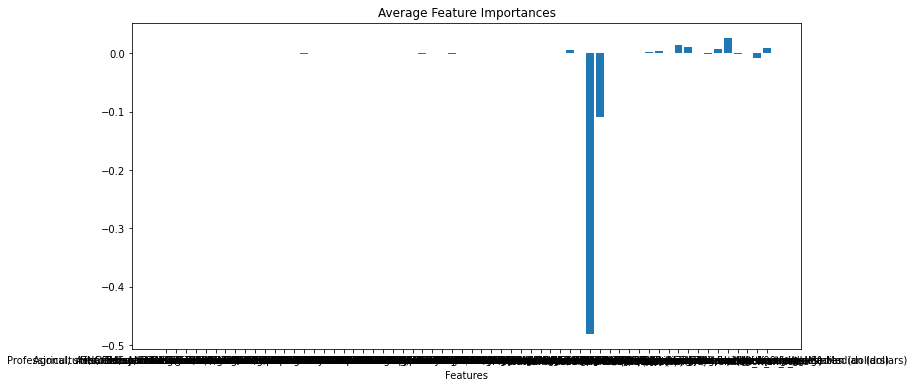

In [412]:
ig = IntegratedGradients(net)
test_input_tensor = X_train_tensor.float()
test_input_tensor.requires_grad_()
attr, delta = ig.attribute(test_input_tensor,target=1, return_convergence_delta=True)
attr = attr.detach().numpy()
feature_names = list(X_train.columns)
def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
visualize_importances(feature_names, np.mean(attr, axis=0))

Own children of the householder 6 to 17 years :  0.006
Median household income (dollars) :  -0.481
Mean household income (dollars) :  -0.109
SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars) :  0.004
GROSS RENT Occupied units paying rent Median (dollars) :  0.015
Population in households :  0.011
Total households :  0.007
Total population :  0.027
relation_max_fee :  -0.009
relation_min_fee :  0.009

### select features whose importance is higher than 0.002 and train Keras neural network model

In [420]:
X_data_simplified = data_301[[
       'Own children of the householder 6 to 17 years',
       'Median household income (dollars)', 'Mean household income (dollars)',
       'SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars)',
       'GROSS RENT Occupied units paying rent Median (dollars)',
       'Population in households', 'Total households', 'Total population',
       'relation_max_fee', 'relation_min_fee']]
y_data_simplified = data_301['label']
X_train, X_test, y_train, y_test = train_test_split(X_data_simplified,
                            y_data_simplified,
                            test_size=0.2,
                            random_state=42)

In [451]:
new_model = keras.models.Sequential([keras.layers.Dense(10, input_dim=10, activation='relu'),
                                 keras.layers.Dense(10, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [452]:
new_model.compile(loss="binary_crossentropy", optimizer="adam")

In [453]:
history = new_model.fit(X_train, y_train, epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 2746.5356
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 262.7485
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 196.7128
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 101.6973
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 80.9363
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 69.5025
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 60.0944
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 50.8769
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 45.2512
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 41.0346
Epoch 11/200
20/20 [==============================] - 0s 2ms/step - loss: 36.5795
Epoch 12/200
20/20 [==============================] - 0s 2ms/step - loss: 38.8197
Epoch 13/200
20/20 [

In [454]:
label = []
for prob in new_model.predict(X_test).flatten():
    if prob >= 0.5:
        label.append(1)
    else:
        label.append(0)

In [455]:
label 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [456]:
sklearn.metrics.accuracy_score(y_test, label)

0.75625

In [458]:
new_model.layers

In [533]:
layer_dict

{'dense_55': <keras.layers.core.dense.Dense at 0x7fd8f50b2760>,
 'dense_56': <keras.layers.core.dense.Dense at 0x7fd8f50b2610>,
 'dense_57': <keras.layers.core.dense.Dense at 0x7fd8f50b2af0>}

In [459]:
from keras import backend as K

In [477]:
layer_dict = dict([(layer.name, layer) for layer in new_model.layers])
input_tensor = new_model.input
layer_output = layer_dict['dense_56'].output
layer_output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_56')>

### build the function to print out the output of second last layer of keras neural network model

In [478]:
func = K.function([input_tensor], [layer_output])
feature = X_train.to_numpy()[0]
activation = func([feature[np.newaxis, :]])

### outputs vector that represents every instance in the sample and merge them with tract id and tract center coordination

In [479]:
X_train.to_numpy()[0]

array([  155., 58000., 74929.,  2028.,  1162.,  1584.,   504.,  1622.,
        1321.,   963.])

In [493]:
list(activation[0].flatten())

[9158.978,
 0.0,
 19948.447,
 1578.0037,
 12865.978,
 0.0,
 3402.8528,
 5282.798,
 0.0,
 0.0]

### output the vector of all samples

In [485]:
X_all_simplify = pd.concat([X_train, X_test])

In [496]:
transformed_feature = []
for i in range(len(X_data_simplified.to_numpy())):
    feature = X_all_simplify.to_numpy()[i] 
    activation = func([feature[np.newaxis, :]])
    transformed_feature.append(list(activation[0].flatten()))

In [497]:
transformed_feature 

[[9158.978,
  0.0,
  19948.447,
  1578.0037,
  12865.978,
  0.0,
  3402.8528,
  5282.798,
  0.0,
  0.0],
 [3436.3481, 0.0, 8972.779, 0.0, 4244.08, 0.0, 0.0, 2619.172, 0.0, 0.0],
 [2944.2651, 0.0, 9348.287, 0.0, 3029.6018, 0.0, 0.0, 2906.731, 0.0, 0.0],
 [3693.464,
  0.0,
  9280.048,
  7.1877904,
  4693.403,
  0.0,
  30.085703,
  2707.5696,
  0.0,
  0.0],
 [1530.5673, 0.0, 4860.3896, 0.0, 1640.0443, 0.0, 0.0, 1625.7205, 0.0, 0.0],
 [19390.703,
  0.0,
  46782.35,
  1184.3972,
  25247.963,
  0.0,
  2361.7214,
  13096.138,
  0.0,
  0.0],
 [11962.553,
  0.0,
  25030.508,
  2541.8308,
  17170.713,
  0.0,
  5543.705,
  6452.0312,
  0.0,
  0.0],
 [5374.9395,
  0.0,
  12367.994,
  600.0848,
  7286.7676,
  0.0,
  1219.3855,
  3373.321,
  0.0,
  0.0],
 [4853.788,
  0.0,
  12147.603,
  251.45488,
  6336.002,
  0.0,
  315.4441,
  3404.1062,
  0.0,
  0.0],
 [5545.5107,
  0.0,
  12066.109,
  966.96564,
  7820.7207,
  0.0,
  2074.7258,
  3195.3157,
  0.0,
  0.0],
 [14131.3125,
  0.0,
  29206.826,
  30

In [498]:
df_all_embedding = pd.DataFrame(transformed_feature)

In [500]:
df201.TRACTCE10.to_list()

[10100.0,
 10201.0,
 10202.0,
 10300.0,
 10400.0,
 10501.0,
 10502.0,
 10503.0,
 10600.0,
 10701.0,
 10702.0,
 20100.0,
 20200.0,
 20301.0,
 20302.0,
 20400.0,
 20500.0,
 20601.0,
 20602.0,
 20701.0,
 20702.0,
 20801.0,
 20802.0,
 20901.0,
 20902.0,
 30101.0,
 30102.0,
 30103.0,
 30104.0,
 30200.0,
 30300.0,
 30400.0,
 30500.0,
 30601.0,
 30603.0,
 30604.0,
 30701.0,
 30702.0,
 30703.0,
 30706.0,
 30800.0,
 30900.0,
 31000.0,
 31100.0,
 31200.0,
 31300.0,
 31400.0,
 31501.0,
 31502.0,
 31700.0,
 31800.0,
 31900.0,
 32100.0,
 40100.0,
 40201.0,
 40202.0,
 40300.0,
 40401.0,
 40402.0,
 40600.0,
 40700.0,
 40800.0,
 40900.0,
 50100.0,
 50200.0,
 50300.0,
 50500.0,
 50600.0,
 50700.0,
 50800.0,
 50900.0,
 51000.0,
 51100.0,
 51200.0,
 51300.0,
 51400.0,
 60100.0,
 60200.0,
 60300.0,
 60400.0,
 60500.0,
 60800.0,
 60900.0,
 61000.0,
 61100.0,
 61200.0,
 61500.0,
 61800.0,
 61901.0,
 61902.0,
 62000.0,
 62100.0,
 62200.0,
 62300.0,
 62400.0,
 62500.0,
 62600.0,
 62700.0,
 62800.0,
 62900.0,


### merge vector dataframe with the tract id and the coordinate of tract center

In [501]:
df_all_embedding["TRACTCE10"] = df201.TRACTCE10.to_list()

In [504]:
df_all_embedding["INTPTLAT"] = df201.INTPTLAT.to_list()

In [505]:
df_all_embedding["INTPTLONG"] = df201.INTPTLONG.to_list()

In [506]:
df_all_embedding["label"] = df201.label.to_list()

In [503]:
X_all_simplify

,Own children of the householder 6 to 17 years,Median household income (dollars),Mean household income (dollars),SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars),GROSS RENT Occupied units paying rent Median (dollars),Population in households,Total households,Total population,relation_max_fee,relation_min_fee
264,155.0,58000.0,74929.0,2028.0,1162.0,1584.0,504.0,1622.0,1321.0,963.0
615,275.0,23354.0,36993.0,1235.0,922.0,1375.0,408.0,1375.0,950.0,778.0
329,111.0,21339.0,40469.0,1807.0,706.0,1390.0,592.0,1390.0,987.0,790.0
342,330.0,24688.0,37984.0,1286.0,1010.0,2398.0,687.0,2398.0,1163.0,742.0
394,228.0,11622.0,20985.0,0.0,284.0,995.0,413.0,995.0,2094.0,362.0
...,...,...,...,...,...,...,...,...,...,...
589,1446.0,45550.0,62721.0,1518.0,780.0,6319.0,1447.0,6319.0,876.0,778.0
797,351.0,45833.0,51562.0,1613.0,1182.0,1699.0,630.0,1699.0,921.0,719.0
743,488.0,29911.0,48973.0,1905.0,822.0,2021.0,757.0,2028.0,998.0,547.0
513,372.0,32674.0,41997.0,1317.0,1057.0,2636.0,945.0,2636.0,1471.0,445.0


In [507]:
df_all_embedding

,0,1,2,3,4,5,6,7,8,9,TRACTCE10,INTPTLAT,INTPTLONG,label
0,9158.977539,0.0,19948.447266,1578.003662,12865.977539,0.0,3402.852783,5282.797852,0.0,0.0,10100.0,42.02,-87.67,1.0
1,3436.348145,0.0,8972.779297,0.000000,4244.080078,0.0,0.000000,2619.172119,0.0,0.0,10201.0,42.02,-87.68,0.0
2,2944.265137,0.0,9348.287109,0.000000,3029.601807,0.0,0.000000,2906.730957,0.0,0.0,10202.0,42.02,-87.67,0.0
3,3693.464111,0.0,9280.047852,7.187790,4693.402832,0.0,30.085703,2707.569580,0.0,0.0,10300.0,42.02,-87.67,0.0
4,1530.567261,0.0,4860.389648,0.000000,1640.044312,0.0,0.000000,1625.720459,0.0,0.0,10400.0,42.01,-87.66,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,7064.851562,0.0,15996.638672,1134.235107,9777.244141,0.0,2232.365479,4216.888672,0.0,0.0,843500.0,41.84,-87.70,1.0
795,7476.261230,0.0,14032.566406,1930.682373,11297.260742,0.0,4715.240234,3726.299561,0.0,0.0,843600.0,41.81,-87.61,0.0
796,4348.656738,0.0,11779.092773,0.000000,5258.115234,0.0,0.000000,3407.470947,0.0,0.0,843700.0,41.95,-87.69,0.0
797,5130.407715,0.0,10982.376953,921.602844,7300.501465,0.0,2124.916992,2952.804443,0.0,0.0,843800.0,41.80,-87.64,0.0


In [508]:
df_all_embedding.to_csv("embedding_econ.csv")

In [510]:
X_all_simplify

,Own children of the householder 6 to 17 years,Median household income (dollars),Mean household income (dollars),SELECTED MONTHLY OWNER COSTS (SMOC) Housing units with a mortgage Median (dollars),GROSS RENT Occupied units paying rent Median (dollars),Population in households,Total households,Total population,relation_max_fee,relation_min_fee
264,155.0,58000.0,74929.0,2028.0,1162.0,1584.0,504.0,1622.0,1321.0,963.0
615,275.0,23354.0,36993.0,1235.0,922.0,1375.0,408.0,1375.0,950.0,778.0
329,111.0,21339.0,40469.0,1807.0,706.0,1390.0,592.0,1390.0,987.0,790.0
342,330.0,24688.0,37984.0,1286.0,1010.0,2398.0,687.0,2398.0,1163.0,742.0
394,228.0,11622.0,20985.0,0.0,284.0,995.0,413.0,995.0,2094.0,362.0
...,...,...,...,...,...,...,...,...,...,...
589,1446.0,45550.0,62721.0,1518.0,780.0,6319.0,1447.0,6319.0,876.0,778.0
797,351.0,45833.0,51562.0,1613.0,1182.0,1699.0,630.0,1699.0,921.0,719.0
743,488.0,29911.0,48973.0,1905.0,822.0,2021.0,757.0,2028.0,998.0,547.0
513,372.0,32674.0,41997.0,1317.0,1057.0,2636.0,945.0,2636.0,1471.0,445.0


In [512]:
X_data_simplified["TRACTCE10"] = df201.TRACTCE10.to_list()
X_data_simplified["INTPTLAT"] = df201.INTPTLAT.to_list()
X_data_simplified["INTPTLONG"] = df201.INTPTLONG.to_list()
X_data_simplified["label"] = df201.label.to_list()

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_90932/2376507721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data_simplified["TRACTCE10"] = df201.TRACTCE10.to_list()
/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_90932/2376507721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data_simplified["INTPTLAT"] = df201.INTPTLAT.to_list()
/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_90932/2376507721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [514]:
X_data_simplified.to_csv("df_original_econ.csv")

### Dimension reduction for all features and plot all instances in two dimensions 

In [515]:
from sklearn.decomposition import PCA

In [518]:
pca = PCA(n_components=2)

In [519]:
X_r = pca.fit(X_data.to_numpy()).transform(X_data.to_numpy())

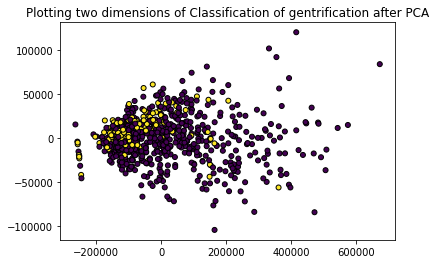

In [521]:
plt.title("Plotting two dimensions of Classification of gentrification after PCA")
plt.scatter(X_r[:, 0], X_r[:, 1], marker='o', c=y_data.to_numpy(), s=25, edgecolor='k')
plt.show()

In [522]:
from sklearn.manifold import TSNE

In [523]:
def plot_tsne(X, y, perplexity=30, colormap=plt.cm.Paired):
    plt.figure(figsize=(8, 6))

    # clean the figure
    plt.clf()

    tsne = TSNE()
    X_embedded = tsne.fit_transform(X)
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap=colormap)
    plt.title("tSNE plot")
    plt.xticks(())
    plt.yticks(())

    plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


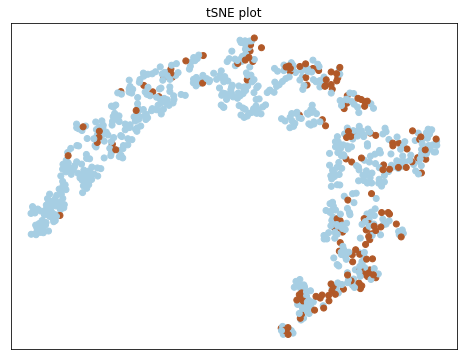

In [527]:
plot_tsne(X_data.to_numpy(), y_data.to_numpy(), perplexity=50)

In [528]:
import metric_learn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


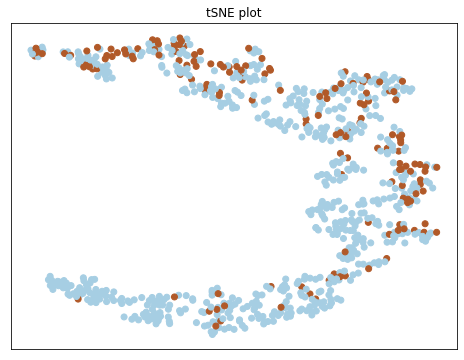

In [529]:
plot_tsne(X_data.to_numpy(), y_data.to_numpy(), perplexity=50)

In [530]:
itml = metric_learn.ITML_Supervised()
X_itml = itml.fit_transform(X_data.to_numpy(), y_data.to_numpy())

/opt/anaconda3/lib/python3.8/site-packages/metric_learn/itml.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack({tuple(row) for row in pairs.reshape(-1, pairs.shape[2])})


/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


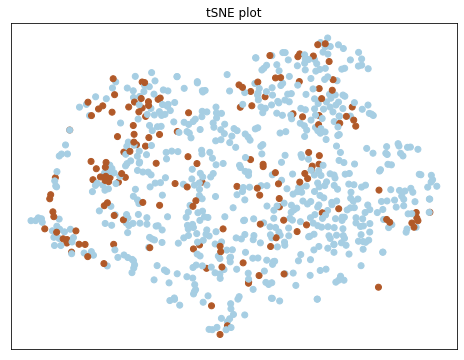

In [531]:
plot_tsne(X_itml, y_data.to_numpy(), perplexity=50)